In this file, we will try most of the way to present data using graphical method.

For this purpose, we will use player's data from 2021 FIDE Chess.com Grand Swiss tournament. Here is the preview of the file (.xlsx), downloaded from chess-results.com:

<img src="chess_data_excel.png" style="width: 600px">

Notice that we want to import the data, but:
- Skip column A and B
- Skip the first four rows
- Skip the last three rows (need to check the .xlsx first)

All of this restriction will be inserted in our code below.

As a general tip, use `help(command/function)` to get the documentation (description, parameter, input, output, or even examples) of the aforementioned command/function.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Example of help
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self: 'FrameOrSeries', n: 'int' = 5) -> 'FrameOrSeries'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3       lion
    

Now, we will import the data using the following command:

In [4]:
# Import data from excel file (.xlsx) under the following conditions:
# - Skip column A and B ('usecols')
# - Skip the first four rows ('skiprows')
# - Skip the last three rows ('skipfooter')
player_data = pd.read_excel('playerData.xlsx', 'Sheet1', usecols="C:G", skiprows=4, skipfooter=3)
print(player_data.head())

# Change the header of the third column from the left to 'Title'
player_data = player_data.rename(columns={"Unnamed: 2": "Title"})
print(player_data.head())

  Unnamed: 2                     Name    FideID  FED   Rtg
0         GM         Caruana Fabiano    2020009  USA  2800
1         GM           Aronian Levon   13300474  ARM  2782
2         GM        Firouzja Alireza   12573981  FRA  2770
3         GM  Vachier-Lagrave Maxime     623539  FRA  2763
4         GM         Vitiugov Nikita    4152956  RUS  2727
  Title                     Name    FideID  FED   Rtg
0    GM         Caruana Fabiano    2020009  USA  2800
1    GM           Aronian Levon   13300474  ARM  2782
2    GM        Firouzja Alireza   12573981  FRA  2770
3    GM  Vachier-Lagrave Maxime     623539  FRA  2763
4    GM         Vitiugov Nikita    4152956  RUS  2727


Don't forget to check data type for each column using `.dtypes`

In [6]:
player_data.dtypes

Title     object
Name      object
FideID     int64
FED       object
Rtg        int64
dtype: object

### 1. Bar Charts

Suppose that we wanted to know how many players come from every chess federation / country. 

First, we need to count how many players are in each federation. This can be done using `value_counts()`.

But we need to specify which column that we want to analyse. For this, we use `player_data["FED"]`.

Thus:

In [7]:
# Count players in each federation
player_data["FED"].value_counts()

# Show five first federation
print(player_data["FED"].value_counts()[:5])

RUS    22
IND    10
UKR     9
ARM     7
USA     5
Name: FED, dtype: int64


For plotting, we will use `matplotlib.pyplot`. Specifically we will use `plt.subplots()` to generate our figure and its axis.

In short, here is the way to plot using bar chart:

<AxesSubplot:title={'center':'Amount of players in every federation'}>

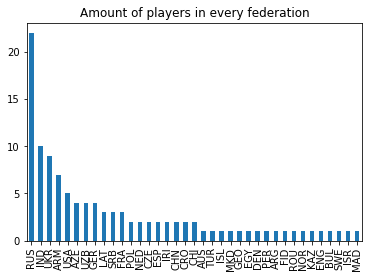

In [8]:
# Plot amount of players on every federation
fig, ax = plt.subplots()
player_data["FED"].value_counts().plot(ax=ax, kind='bar', title="Amount of players in every federation")

As can be seen above, the chart is very dense. There are several ways to fix this issue:
1. Using different chart size (make it wider)
2. Only show federation with high value

<AxesSubplot:title={'center':'Amount of players in every federation'}>

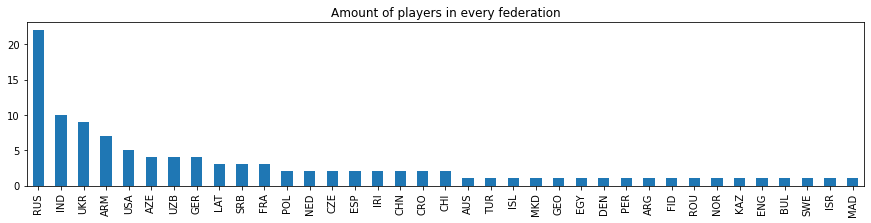

In [9]:
# Change plot size
fig, ax = plt.subplots(figsize=(15, 3))
player_data["FED"].value_counts().plot(ax=ax, kind='bar', title="Amount of players in every federation")

<AxesSubplot:title={'center':'Amount of players on 10 federations with\n the most players in 2021 FIDE Grand Swiss'}>

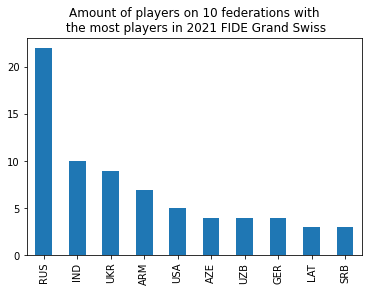

In [10]:
# Only shows top 10 value
fig, ax = plt.subplots()
player_data["FED"].value_counts()[:10].plot(ax=ax, kind='bar', title="Amount of players on 10 federations with\n the most players in 2021 FIDE Grand Swiss")
# Because 'player_data["FED"].value_counts()' is a list, we can pick 10 highest value using traditional 
#   list method.

Disadvantages of changing chart's size are:
- More unique value = wider figure
- Chart will be hard to be presented, especially on wider figure
- y-value difference looks smaller than it should be

Disadvantage of decreasing the amount of items shown:
- Data is not completely shown (by voiding it entirely or collectively shown under new initial like 'etc', 'misc', etc.)

### 2. Histogram

Histogram is similar with bar chart. The only difference is in its x-axis.

While bar chart can use categorical data for its x-axis (e.g. Federation, Title), histogram uses numerical continuous data (e.g. Rating, Age, or Score).

For this example, suppose that we want to plot player's rating using this chart.

(1)

The easiest way to do it is to use `.hist(col)`, with `col` is the name of the column we want to show. This can be done only when our data is a `DataFrame`.

array([[<AxesSubplot:title={'center':'Rtg'}>]], dtype=object)

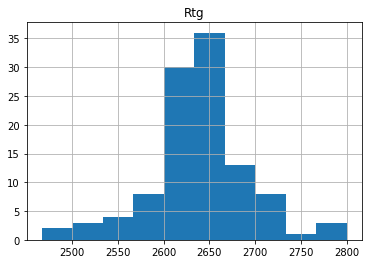

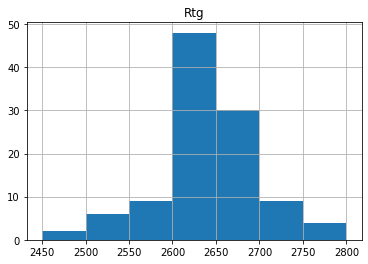

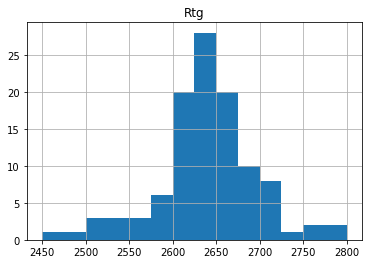

In [11]:
player_data.hist('Rtg')

# Divided by every 50 ratings, from 2450 to 2800
player_data.hist('Rtg', bins=[x for x in range(2450, 2850, 50)])

# Divided by every 25 ratings, from 2450 to 2800
player_data.hist('Rtg', bins=[x for x in range(2450, 2825, 25)])

Another way to present the data using histogram is to use matplotlib's bar (similar with the first section). Unfortunately, this way is a bit more complicated than the previous one. One reason this may be done is if the data can't be converted to a `DataFrame`.

To accommodate the bin/buckets (or list of range) of our data, we need another a class called `Counter` under `collections` library

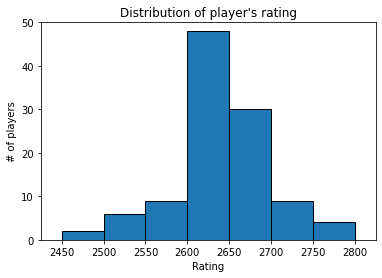

In [27]:
from collections import Counter

# Generate histogram bin (or list of range)
his_bins = Counter(min(rating // 50 * 50, 2750) for rating in player_data["Rtg"])

fig, ax = plt.subplots()

ax.bar(x=[x+25 for x in his_bins],
       height=his_bins.values(),
       width=50,
       edgecolor=(0, 0, 0))

ax.axis([2425, 2825, 0, 50])

# Other
plt.xticks([i for i in range(2450, 2850, 50)])
plt.xlabel("Rating")
plt.ylabel("# of players")
plt.title("Distribution of player's rating")
plt.show()
